## データの取得(実行のみ)

ポケモン図鑑から取得(https://zukan.pokemon.co.jp)

In [1]:
import requests
from bs4 import BeautifulSoup
import csv
import os
import urllib
import urllib.request

def create_csv(filename):
  with open(filename, "w", encoding="utf-8") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["idx", "name", "omosa", "takasa", "bunrui", "tokusei_1", "tokusei_2", "type_1", "type_2", "text_1", "text_2", "spec_hp", "spec_kougeki", "spec_bougyo", "spec_tokukou", "spec_tokubou", "spec_subayasa"])

def scraping_save(num, csv_filename):    
  site = requests.get("https://zukan.pokemon.co.jp/detail/" + num)
  data = BeautifulSoup(site.text, "html.parser")

  title_part = data.find_all("script", {"type": "application/json"})
  item = title_part[0].contents[0].strip()

  #ポケモンの情報
  target_info = item.split('],"evolutionsType"')[0]
  print(target_info)
  idx = target_info.split('"no":"')[1].split('"')[0]
  name = target_info.split('"name":"')[1].split('"')[0]
  omosa = target_info.split('"omosa":"')[1].split('"')[0]
  takasa = target_info.split('"takasa":"')[1].split('"')[0]
  bunrui = target_info.split('"bunrui":"')[1].split('"')[0]
  tokusei_1 = target_info.split('"tokusei_1":')[1].split(',')[0]
  tokusei_2 = target_info.split('"tokusei_2":')[1].split(',')[0]
  type_1 = target_info.split('"type_1":')[1].split(',')[0]
  type_2 = target_info.split('"type_2":')[1].split(',')[0]
  text_1 = target_info.split('"text_1":"')[1].split('"')[0]
  text_2 = target_info.split('"text_2":"')[1].split('"')[0]
  spec_hp = target_info.split('"spec_hp":')[1].split(',')[0]
  spec_kougeki = target_info.split('"spec_kougeki":')[1].split(',')[0]
  spec_bougyo = target_info.split('"spec_bougyo":')[1].split(',')[0]
  spec_tokukou = target_info.split('"spec_tokukou":')[1].split(',')[0]
  spec_tokubou = target_info.split('"spec_tokubou":')[1].split(',')[0]
  spec_subayasa = target_info.split('"spec_subayasa":')[1].split(',')[0]
  fig_url = target_info.split('"image_m":')[1].split('"')[1]
  fig_url = fig_url.replace('\/', '/')

  #　save
  with open(csv_filename, "a", encoding="utf-8") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow([idx, name, omosa, takasa, bunrui, tokusei_1, tokusei_2, type_1, type_2, text_1, text_2, spec_hp, spec_kougeki, spec_bougyo, spec_tokukou, spec_tokubou, spec_subayasa])

  return fig_url

def save_image(fig_url, n_):    
  response = requests.get(fig_url)
  image = response.content
  file_name = ("images/%s.png"%n_)

  with open(file_name, "wb") as f:
    f.write(image)
  done = 1
  return done

csv_filename = "pokemon_info.csv"

#画像の保存先
save_path = "images"
if not os.path.exists("images"):
  os.mkdir("images")

#csv
if not os.path.exists(csv_filename):
  create_csv(csv_filename)
    
for n in range(1,10):    
  #scraping
  n_ = str("%03d"%n)
  fig_url = scraping_save(n_, csv_filename)
  done = save_image(fig_url, n_)
  
  if done == 1:
    try:
      for j in range(1,10):
        n_ = str("%03d-%d"%(n, j) )
        fig_url = scraping_save(n_, csv_filename)
        _ = save_image(fig_url, n_)
    except:
      pass

{"pokemon":{"no":"001","sub":0,"name":"フシギダネ","sub_name":"","area":1,"omosa":"6.9","takasa":"0.7","sex":1,"bunrui":"たねポケモン","tokusei_1":82,"tokusei_2":0,"type_1":4,"type_2":8,"text_1":"うまれたときから　せなかに　しょくぶつの　タネが　あって　すこしずつ　おおきく　そだつ。　（『ポケモン ソード』より）","text_2":"うまれて　しばらくの　あいだ　せなかの　タネに　つまった　えいようを　とって　そだつ。　（『ポケモン シールド』より）","spec_hp":3,"spec_kougeki":3,"spec_bougyo":3,"spec_tokukou":4,"spec_tokubou":4,"spec_subayasa":3,"sugata_text_flg":0,"sugata_text":"","mega_flg":0,"genshi_flg":0,"kyodai_flg":0,"image_l":"https:\/\/zukan.pokemon.co.jp\/zukan-api\/up\/images\/index\/5e1db695135dd89787cfe0927d08211c.jpg","image_m":"https:\/\/zukan.pokemon.co.jp\/zukan-api\/up\/images\/index\/7b705082db2e24dd4ba25166dac84e0a.png","image_s":"https:\/\/zukan.pokemon.co.jp\/zukan-api\/up\/images\/index\/afa02eaba4c39820fc57f4e8abaeea80.png","zukan_no":"001"},"abilities":[{"id":82,"name":"しんりょく","exp":"ＨＰが　へったとき　くさタイプの　わざの　いりょくが　あがる。"}
{"pokemon":{"no":"002","sub":0,"name":"フシギソウ","sub_name":"","area":1,"omosa":"13

## 画像編(復習)
参考: https://pystyle.info/pytorch-list-of-transforms/

### 準備(実行のみ)

In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from PIL import Image
from PIL import ImageFilter

import torch
import torchvision
from torchvision import transforms

In [3]:
def loadImg(path):
  img = Image.open(path)
  img.load()
  bg = Image.new("RGB", img.size, (255, 255, 255))
  bg.paste(img, mask=img.split()[3])
  return bg

def display(images):
  plt.figure(figsize=(15,8))
  plt.subplots_adjust(wspace=0, hspace=0)
  for i, img in enumerate(images):
    plt.subplot(1, len(images), i+1)
    plt.tick_params(labelbottom=False,labelleft=False,bottom=False,left=False)
    plt.imshow(img)
  plt.show()

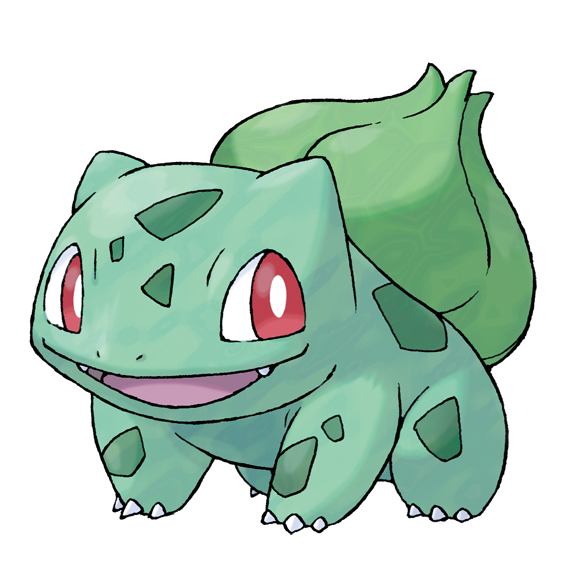

In [4]:
img = loadImg('images/001.png')
img

### 1. (128\*128)にサイズ変換する

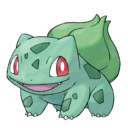

In [5]:
transform = transforms.Resize(128)

img = transform(img)
img

### 2. 色彩を変化させる

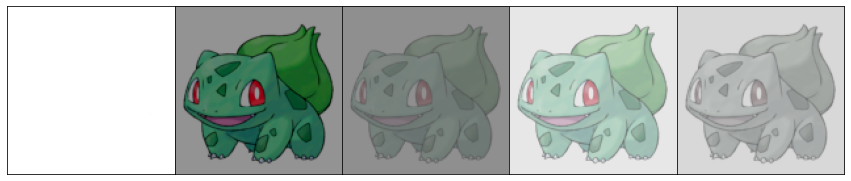

In [6]:
transform = transforms.ColorJitter(brightness=0.5, contrast=1, saturation=1)

img_ = [transform(img) for _ in range(5)]
display(img_)

### 3. ランダムに左右反転させる

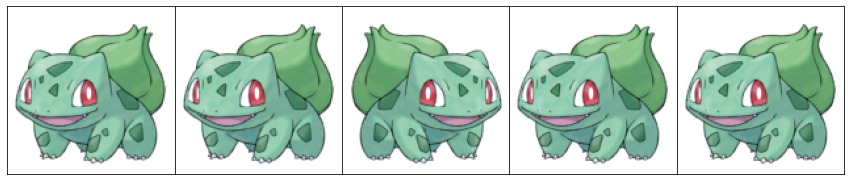

In [7]:
transform = transforms.RandomHorizontalFlip(0.5)

img_ = [transform(img) for _ in range(5)]
display(img_)

### 4. ランダムに20度回転、縦横移動、拡大縮小、白でパディングをさせる(アフィン変換)

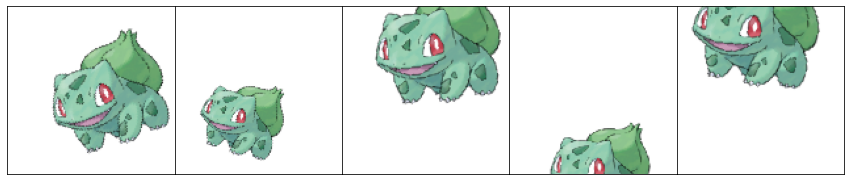

In [8]:
transform = transforms.RandomAffine(20, translate=(0.1,0.5), scale=(0.5,1.2), fill=255)

img_ = [transform(img) for _ in range(5)]
display(img_)

## 自作データセット編
参考: https://pystyle.info/pytorch-how-to-create-custom-dataset-class/

### 準備(実行のみ)

In [9]:
# 画像表示用の関数
def display_loader(loader):
  plt.figure(figsize=(40,8))
  plt.subplots_adjust(wspace=0, hspace=0)
  loc = 1
  for epoch in range(3):
    t = []
    for img, tp in loader:
      plt.subplot(3, 16, loc)
      plt.tick_params(labelbottom=False,labelleft=False,bottom=False,left=False)
      plt.imshow(np.transpose(img,(0,2,3,1)).squeeze())
      loc += 1
      t.append(tp)
    print(t)
  plt.show()

### Sample. データセットの作成

- torch.utils.data.Datasetを継承
- `__init__`関数、`__getitem__`関数、`__len__`関数が必要

In [10]:
class MyDataset(torch.utils.data.Dataset):
  def __init__(self, transform = None):
    self.transform = transform

    self.data = [1, 2, 3, 4, 5, 6]
    self.label = [0, 1, 0, 1, 0, 1]

  def __getitem__(self, idx):
    out_data = self.data[idx]
    out_label = self.label[idx]

    return out_data, out_label

  def __len__(self):
    return len(self.data)

### Sample. データローダーの作成

- torch.utils.data.DataLoaderを用いて作成したデータセットをロードする



In [11]:
dataset = MyDataset()
loader = torch.utils.data.DataLoader(dataset, shuffle=False, batch_size=1)

for x, y in loader:
  print("data:", x, "label:", y)

data: tensor([1]) label: tensor([0])
data: tensor([2]) label: tensor([1])
data: tensor([3]) label: tensor([0])
data: tensor([4]) label: tensor([1])
data: tensor([5]) label: tensor([0])
data: tensor([6]) label: tensor([1])


### 5. 画像とタイプを出力するデータセットを作成する
- images/*.pngから画像を取得
 - 注意: PNG画像がRGBAになっているので以下を利用しRGBに変換
```python
img = Image.open(path)
img.load()
bg = Image.new("RGB", img.size, (255, 255, 255))
bg.paste(img, mask=img.split()[3])
```
- pokemon_info.csvからポケモンのタイプを取得
 - pokemon_info.csvには以下の情報が含まれる
   - idx: 図鑑番号
   - name: 名前
   - omosa: おもさ
   - takasa: 高さ
   - bunrui: 分類
   - tokusei_1: 特性1
   - tokusei_2: 特性2
   - type_1: タイプ1
   - type_2: タイプ2
   - text_1: 説明文1
   - text_2: 説明文2
   - spec_hp: HP
   - spec_kougeki: こうげき
   - spec_bougyo: ぼうぎょ
   - spec_tokukou: とくこう
   - spec_tokubou: とくぼう
   - spec_subayasa: すばやさ

#### 準備(実行のみ)

In [12]:
# ポケモン図鑑の順番にパスを取得
img_path = []
for i in range(1, 10):
  img_path.append("images/%03d.png" % i)
  for j in range(1, 10):
    if os.path.exists("images/%03d-%d.png" %( i, j)):
      img_path.append("images/%03d-%d.png" % (i, j))

### 5-1. データセットを作成する
- 画像とポケモンの情報のパスを指定し読み込む
- transformを受け取り画像に適用する
- RGBA画像をRGBに変換する
- typeはtensor, float型に変換する

In [13]:
class MyDataset(torch.utils.data.Dataset):
  def __init__(self, img_paths, info_path, transform=None):
    # 画像ファイルのパス一覧を取得
    self.img_paths = img_paths
    # タイプと能力を読み込む
    self.types = self.loadInfo(info_path)
    self.transform = transform

  def __getitem__(self, idx):
    # 画像を読み込む
    img = self.loadImg(self.img_paths[idx])
    # タイプと能力
    types = self.types[idx]

    if self.transform is not None:
      # 前処理がある場合は行う
      img = self.transform(img)

    return img, torch.from_numpy(types).float()

  def __len__(self):
    return len(self.img_paths)

  def loadImg(self, path):
    img = Image.open(path)
    img.load()
    bg = Image.new("RGB", img.size, (255, 255, 255))
    bg.paste(img, mask=img.split()[3])
    return bg
  
  def loadInfo(self, path):
    info = pd.read_csv(path)
    types = info[["type_1", "type_2"]].values
    return types

### 5-2. データローダーを作成しデータを表示する
- 128にリサイズしたのちランダム左右反転、ランダムアフィン変換、色彩の変換、tensor変換を行うtransformを適用する

[tensor([[4., 8.]]), tensor([[4., 8.]]), tensor([[4., 8.]]), tensor([[4., 8.]]), tensor([[4., 8.]]), tensor([[2., 0.]]), tensor([[2., 0.]]), tensor([[ 2., 10.]]), tensor([[ 2., 15.]]), tensor([[ 2., 10.]]), tensor([[ 2., 10.]]), tensor([[3., 0.]]), tensor([[3., 0.]]), tensor([[3., 0.]]), tensor([[3., 0.]]), tensor([[3., 0.]])]
[tensor([[4., 8.]]), tensor([[4., 8.]]), tensor([[4., 8.]]), tensor([[4., 8.]]), tensor([[4., 8.]]), tensor([[2., 0.]]), tensor([[2., 0.]]), tensor([[ 2., 10.]]), tensor([[ 2., 15.]]), tensor([[ 2., 10.]]), tensor([[ 2., 10.]]), tensor([[3., 0.]]), tensor([[3., 0.]]), tensor([[3., 0.]]), tensor([[3., 0.]]), tensor([[3., 0.]])]
[tensor([[4., 8.]]), tensor([[4., 8.]]), tensor([[4., 8.]]), tensor([[4., 8.]]), tensor([[4., 8.]]), tensor([[2., 0.]]), tensor([[2., 0.]]), tensor([[ 2., 10.]]), tensor([[ 2., 15.]]), tensor([[ 2., 10.]]), tensor([[ 2., 10.]]), tensor([[3., 0.]]), tensor([[3., 0.]]), tensor([[3., 0.]]), tensor([[3., 0.]]), tensor([[3., 0.]])]


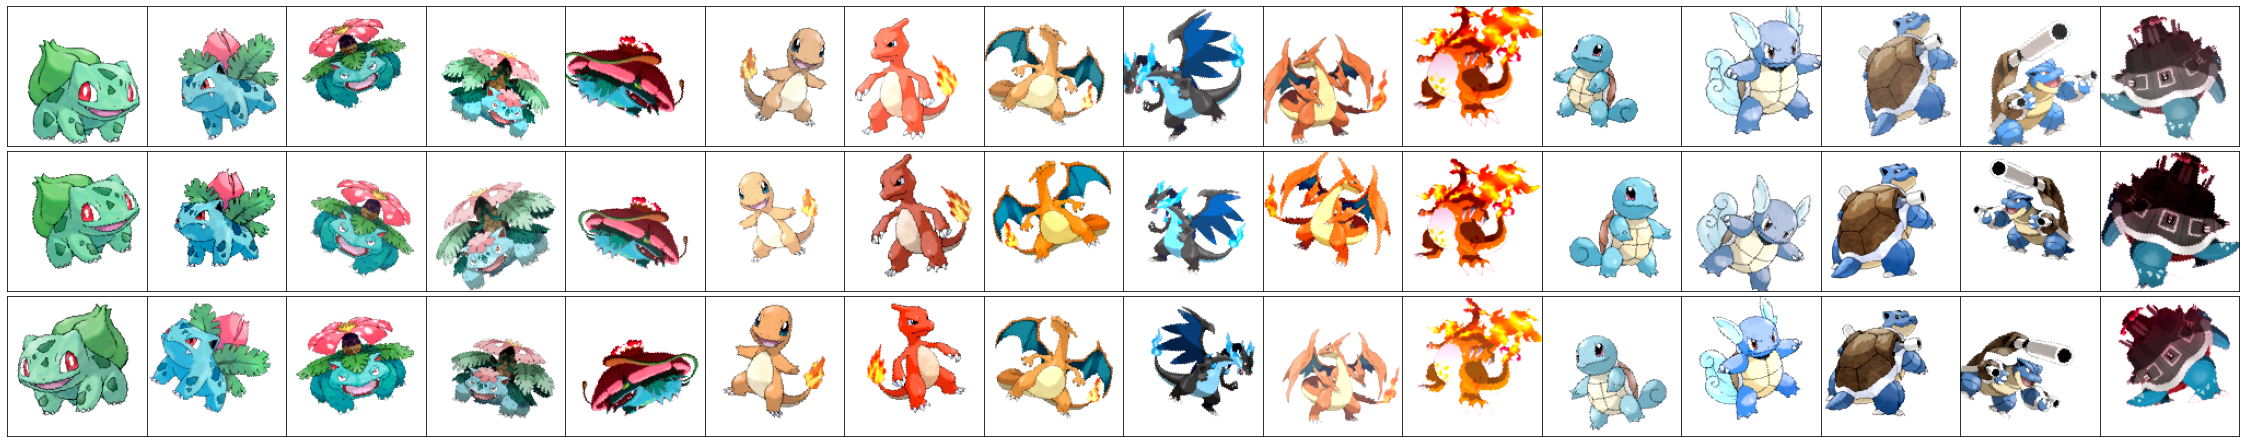

In [14]:
transform = transforms.Compose([transforms.Resize(128),
                                transforms.RandomHorizontalFlip(0.5),
                                transforms.RandomAffine(degrees=30,translate=[0.1,0.1],scale=[0.8,1],fill=(255,255,255)),
                                transforms.ColorJitter(brightness=[1.0,1.2], contrast=[1.0,1.5], saturation=0.5),
                                transforms.ToTensor()])

dataset = MyDataset(img_path, "pokemon_info.csv", transform=transform)
loader = torch.utils.data.DataLoader(dataset, shuffle=False, batch_size=1)

display_loader(loader)

### 6. 好きなようにデータセット作成する(オプション)
- スクレイピングや手持ちのデータを使用して新たなデータセットを作成する
- データを出力する

## 言語編
参考: https://qiita.com/kenta1984/items/5ba254afa8a524381c43

### 準備(実行のみ)

In [15]:
!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!ln -s /etc/mecabrc /usr/local/etc/mecabrc
!pip install  mecab-python3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
aptitude is already the newest version (0.8.10-6ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
mecab is already installed at the requested version (0.996-5)
libmecab-dev is already installed at the requested version (0.996-5)
mecab-ipadic-utf8 is already installed at the requested version (2.7.0-20070801+main-1)
git is already installed at the requested version (1:2.17.1-1ubuntu0.9)
make is already installed at the requested version (4.1-9.1ubuntu1)
curl is already installed at the requested version (7.58.0-2ubuntu3.16)
xz-utils is already installed at the requested version (5.2.2-1.3)
file is already installed at the requested version (1:5.32-2ubuntu0.4)
mecab is already installed at the requested version (0.996-5)
libmecab-dev is already installed at the requested version (0.996-5)
mecab-ipadic-utf8 is already installed at the requested version (2.7.0-20070801+ma

In [16]:
# ポケモンの情報から説明文1とタイプ1を取得
info = pd.read_csv("pokemon_info.csv")
sentences = []
text = info["text_1"].values
type = info["type_1"].values
for t in text:
  # 空白で分割し最後の引用の部分を削除
  t = ''.join(t.split("\u3000")[:-1])
  # Google Transliterate APIを利用してひらがな→漢字に変換(ひらがなのみだとMeCabが不安定なため)
  site = requests.get("http://www.google.com/transliterate?langpair=ja-Hira|ja&text="+t)
  sentence = []
  for s in site.text.split("],"):
    s = s.split(",")
    s = s[1].replace('["',  "")
    sentence.append(s.replace('"',  ""))
  sentences.append("".join(sentence))
np.savetxt("text_type.csv", np.stack([sentences, type], 1), delimiter=",", fmt="%s")

In [17]:
import torchtext
from torchtext.vocab import FastText
from torchtext.legacy import data

import MeCab

## 7. MeCabで分かち書きするtokenize関数を定義する

In [18]:
mt = MeCab.Tagger("-Owakati")

def tokenize(text):
    return mt.parse(text).split()

## 8. Fieldを定義して、TabularDatasetを作成する
- TEXT Fieldとlabel Fieldを作成する
- TEXT Fieldにはtokenizeを指定する

In [19]:
# Fieldオブジェクトの作成
TEXT = data.Field(tokenize = tokenize)
LABEL = data.Field(sequential = False, use_vocab = False)

# CSVファイルを読み込み、TabularDatasetオブジェクトの作成
dataset = data.TabularDataset(
    path="./text_type.csv",
    format="csv",
    fields=[("text", TEXT), ("label", LABEL)])

## 9. textとlabelを表示する

In [20]:
for example in dataset:
  print("TEXT:", example.text)
  print("LABEL:", example.label)

TEXT: ['生まれ', 'た', '時', 'から', '背中', 'に', '植物', 'の', 'タネ', 'が', 'あっ', 'て', '少し', 'ずつ', '大きく', '育つ', '。']
LABEL: 4
TEXT: ['背中', 'の', '蕾', 'が', '大きく', '育っ', 'て', 'くる', 'と', '２', '本', '足', 'で', '立つ', 'こと', 'が', 'でき', 'なく', 'なる', 'らしい', '。']
LABEL: 4
TEXT: ['太陽', 'エネルギー', 'を', '栄養', 'に', 'し', 'て', '大きな', 'ハナ', 'が', '開く', '。', '日向', 'に', '引き寄せ', 'られる', 'よう', 'に', '移動', 'する', '。']
LABEL: 4
TEXT: ['大きな', '花弁', 'を', '広げ', '太陽', 'の', '光', 'を', '浴び', 'て', 'いる', 'と', '体', 'に', '元気', 'が', 'みなぎっ', 'て', 'いく', '。']
LABEL: 4
TEXT: ['２', '本', 'の', '太い', 'ツル', 'を', '振り回し', '戦う', '。', '１', '０', '階', '建て', 'の', 'ビル', 'を', '軽く', 'なぎ倒す', 'ほど', 'パワフル', 'だ', '。']
LABEL: 4
TEXT: ['暑い', 'もの', 'を', '好む', '正確', '。', '雨', 'に', '濡れる', 'と', '尻尾', 'の', '先', 'から', '煙', 'が', 'でる', 'と', 'いう', '。']
LABEL: 2
TEXT: ['燃える', '尻尾', 'を', '振り回し', '鋭い', 'ツメ', 'で', '相手', 'を', '切り裂く', '荒々しい', '性格', '。']
LABEL: 2
TEXT: ['岩石', 'も', '焼ける', 'よう', 'な', '灼熱', 'の', '炎', 'を', '吐い', 'て', '山', '火事', 'を', '起こす', 'こと', 'が', 'ある', '。']
LABEL: 2

## 10. FastTextを使用してvocabを作成する
少し時間がかかる

In [21]:
TEXT.build_vocab(dataset, vectors=FastText(language="ja"))

### 11. 単語ごとの出現回数を表示する

In [22]:
print(TEXT.vocab.freqs)

Counter({'。': 138, 'の': 132, 'を': 102, 'て': 72, 'が': 66, 'に': 60, 'は': 36, 'と': 30, 'とき': 30, 'から': 24, 'で': 24, '尻尾': 24, '炎': 24, 'いる': 18, '体': 18, 'だ': 18, '先': 18, '相手': 18, 'な': 18, '灼熱': 18, 'さ': 18, 'た': 12, '背中': 12, '大きく': 12, '２': 12, '本': 12, 'こと': 12, '太陽': 12, '大きな': 12, 'よう': 12, 'する': 12, '振り回し': 12, '１': 12, '口': 12, '吐き出す': 12, 'より': 12, '赤く': 12, '激しく': 12, '燃え上がる': 12, 'れ': 12, '甲羅': 12, '長生き': 12, '重たく': 12, 'のしかかっ': 12, '気絶': 12, 'せる': 12, 'ピンチ': 12, 'カラ': 12, '隠れる': 12, '売っ': 12, '生まれ': 6, '時': 6, '植物': 6, 'タネ': 6, 'あっ': 6, '少し': 6, 'ずつ': 6, '育つ': 6, '蕾': 6, '育っ': 6, 'くる': 6, '足': 6, '立つ': 6, 'でき': 6, 'なく': 6, 'なる': 6, 'らしい': 6, 'エネルギー': 6, '栄養': 6, 'し': 6, 'ハナ': 6, '開く': 6, '日向': 6, '引き寄せ': 6, 'られる': 6, '移動': 6, '花弁': 6, '広げ': 6, '光': 6, '浴び': 6, '元気': 6, 'みなぎっ': 6, 'いく': 6, '太い': 6, 'ツル': 6, '戦う': 6, '０': 6, '階': 6, '建て': 6, 'ビル': 6, '軽く': 6, 'なぎ倒す': 6, 'ほど': 6, 'パワフル': 6, '暑い': 6, 'もの': 6, '好む': 6, '正確': 6, '雨': 6, '濡れる': 6, '煙': 6, 'でる': 6, 'いう': 6, '燃える': 6,

### 12. 「灼熱」の語彙のインデックスを表示する

In [23]:
print(TEXT.vocab.stoi["灼熱"])

21


### 13. インデックス番号100の語彙を表示する

In [24]:
print(TEXT.vocab.itos[100])

射撃


### 14. 「エネルギー」の単語ベクトルを表示する

In [25]:
print(TEXT.vocab.vectors[TEXT.vocab.stoi["エネルギー"]])

tensor([  0.3883,  -0.1935,  -0.8956,  -3.1308,  -0.0966,  -1.0789,   0.9422,
          0.6659,   1.5361,  -1.1567,  -0.0459,   1.1106,  -0.7828,  -0.7440,
          0.9520,  -0.5989,  -2.0008,  -1.2474,  -1.2047,   1.1991,   0.5479,
         -1.4071,  -1.1434,  -0.2146,   0.3134,  -2.1713,   1.3991,   0.6331,
          0.0844,  -1.8208,   0.0603,  -0.2051,  -2.2157,  -2.0531,  -1.2403,
         -0.8292,  -1.2213,  -1.8246,   2.0604,  -1.4826,   0.5798,   1.7168,
          1.1471,  -1.4698,  -1.4840,  -0.3582,   0.9407,   0.8992,   0.9946,
          0.6571,  -1.8196,   1.0450,  -0.1785,   2.1705,   0.5594,  -0.6304,
         -0.2700,   1.0251,  -1.2491,   0.8553,   0.0938,   0.9282,   0.2334,
          1.3228,  -0.9544,  -0.9371,   1.3055,   1.4179,   2.7028,  -1.8679,
          0.8794,   1.2308,  -1.7128,   1.6468,  -1.6067,   0.1906,  -0.0521,
          1.1760,  -1.4112,   1.5725,  -0.6896,   2.0319,   1.0105,   4.6714,
          0.1658,   0.4141,   0.7645,   1.2100,  -0.7129,  -1.25

### 15. イテレーターを作成し、バッチの中身を確認する

In [26]:
iter = data.Iterator(dataset, batch_size=1)

for batch in iter:
  print("TEXT:", batch.text)
  print("LABEL:", batch.label)

TEXT: tensor([[ 48],
        [  3],
        [ 77],
        [  9],
        [ 16],
        [ 30],
        [  5],
        [ 15],
        [  2],
        [ 44],
        [  7],
        [ 76],
        [  6],
        [ 59],
        [  5],
        [ 15],
        [  3],
        [  8],
        [127],
        [ 48],
        [  3],
        [ 74],
        [ 17],
        [  2]])
LABEL: tensor([3])
TEXT: tensor([[33],
        [11],
        [21],
        [ 3],
        [14],
        [ 4],
        [34],
        [10],
        [13],
        [ 3],
        [20],
        [ 8],
        [29],
        [46],
        [42],
        [43],
        [ 2]])
LABEL: tensor([2])
TEXT: tensor([[33],
        [11],
        [21],
        [ 3],
        [14],
        [ 4],
        [34],
        [10],
        [13],
        [ 3],
        [20],
        [ 8],
        [29],
        [46],
        [42],
        [43],
        [ 2]])
LABEL: tensor([2])
TEXT: tensor([[132],
        [ 18],
        [100],
        [  8],
        [ 82],
     

### 16. 好きなようデータセット作成する(オプション)
- スクレイピングや手持ちのテキストデータを使用して新たなデータセットを作成する
- データを出力する